In [1]:
!pip install tensorflow tensorflow_gpu pandas matplotlib sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
np.expand_dims

<function numpy.expand_dims(a, axis)>

In [4]:
df=pd.read_csv('/content/train (2).csv')

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [7]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [8]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [9]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [10]:
#processes
!pip list
from tensorflow.keras.layers import TextVectorization

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [11]:
x=df['comment_text']
y=df[df.columns[2:]].values

In [12]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [13]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [14]:
df.columns[2:].values

array(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'], dtype=object)

In [15]:
MAX_FEATURES=200000 #number of words in the vocab
vectorizer=TextVectorization(max_tokens=MAX_FEATURES,output_sequence_length=1800,output_mode='int')


In [16]:
vectorizer.adapt(x.values)

In [17]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [18]:
vectorized_text=vectorizer(x.values)
len(x)

159571

In [19]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [20]:
tf.data.Dataset.list_files

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None)>

In [21]:
#Mcshbap-map,chache,shuffle,batch,prefetch from_tensor_slices,list_dir
dataset=tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset=dataset.cache()
dataset=dataset.shuffle(160000)
dataset=dataset.batch(16)
dataset=dataset.prefetch(8)

In [22]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [23]:
len(dataset)*.7

6981.799999999999

In [24]:
batch_x.shape

(16, 1800)

In [25]:
train=dataset.take(int(len(dataset)*.7))
val=dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test=dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [26]:
len(train)

6981

In [27]:
train_generator=train.as_numpy_iterator()

In [28]:
train_generator.next()

(array([[ 1122,    46,   290, ...,     0,     0,     0],
        [ 8704,   390,   171, ...,     0,     0,     0],
        [   22,   595,     5, ...,     0,     0,     0],
        ...,
        [ 4744, 11400, 18259, ...,     0,     0,     0],
        [  651,     2,   145, ...,     0,     0,     0],
        [    2,   842,     4, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [29]:
#creating sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Embedding

In [30]:
model=Sequential()
#Create the embedding layer
model.add(Embedding(MAX_FEATURES+2,32))
# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32,activation='tanh')))
#feature extractor fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
# final layer
model.add(Dense(6,activation='sigmoid'))

In [31]:
model.compile(loss='BinaryCrossentropy',optimizer='Adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400064   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [33]:
history=model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 757s 107ms/step - loss: 0.0665 - val_loss: 0.0470


In [34]:
history.history

{'loss': [0.06646890193223953], 'val_loss': [0.046981025487184525]}

In [35]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

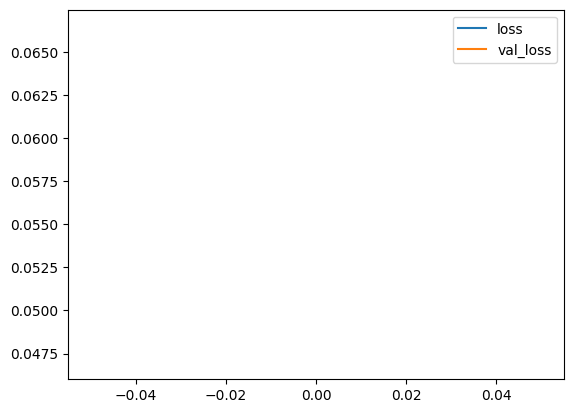

In [36]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [37]:
#making prediction
input_text=vectorizer('You freaking suck! Iam going to hit you')
df.columns[2:]
batch=test.as_numpy_iterator().next()
batch_x,batch_y=test.as_numpy_iterator().next()

In [38]:
model.predict((batch_x)>0.5).astype(int)

1/1 [==============================] - 1s 985ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [39]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


array([[0.9961421 , 0.20980059, 0.94840294, 0.0233992 , 0.82696676,
        0.13602208]], dtype=float32)

In [40]:
res=model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 79ms/step


In [41]:
#evaluate model
from tensorflow.keras.metrics import Precision,Recall,CategoricalAccuracy

In [42]:
pre=Precision()
re=Recall()
acc=CategoricalAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
  #unpack the batch
  x_true,y_true=batch
  # make a prediction
  yhat=model.predict(x_true)
  # flatten the predictions
  y_true=y_true.flatten()
  yhat=yhat.flatten()
  pre.update_state(y_true,yhat)
  re.update_state(y_true,yhat)
  acc.update_state(y_true,yhat)

1/1 [==============================] - 0s 53ms/step


In [44]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.7809523940086365,Recall:0.7136440277099609,Accuracy:0.47843530774116516


In [45]:
# Test and Gradio
!pip install gradio jinja2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 10.4 MB/s eta 0

In [46]:
import tensorflow as tf
import gradio as gr

In [47]:
model.save('toxicity.h5')

In [48]:
model=tf.keras.models.load_model('toxicity.h5')

In [49]:
input_str=vectorizer('hey freaken I hate you')

In [50]:
res=model.predict(np.expand_dims(input_str,0))
res

1/1 [==============================] - 1s 693ms/step


array([[0.9122993 , 0.04647835, 0.59184027, 0.02263004, 0.44483152,
        0.06610455]], dtype=float32)

In [51]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [52]:
def score_comment(comment):
  vectorized_comment=vectorizer([comment])
  results=model.predict(vectorized_comment)
  text=''
  for idx, col in enumerate(df.columns[2:-1]):
    text+= '{}: {}\n'.format(col,results[0][idx]>0.5)
  return text

In [53]:
interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder='comments to score'),outputs='text')

<ipython-input-53-d8a33c59f5bb>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder='comments to score'),outputs='text')
<ipython-input-53-d8a33c59f5bb>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder='comments to score'),outputs='text')
<ipython-input-53-d8a33c59f5bb>:1: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  interface=gr.Interface(fn=score_comment,inputs=gr.inputs.Textbox(lines=2,placeholder='comments to score'),outputs='text')


In [54]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5d3898979387bcd9e4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
